In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [21]:
# hyper parameters

num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [22]:
# dataset has PILimage image of range [0,1]
# we transform them to tensers of normalized range [-1,1]

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [23]:
# CIFAR10
train_dataset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,
                                           transform=transforms.ToTensor())

test_dataset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True,
                                           transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle =True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=batch_size,
                                           shuffle =False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

Files already downloaded and verified
Files already downloaded and verified
torch.Size([4, 3, 32, 32]) torch.Size([4])


In [24]:
classes = ('airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck')

In [25]:
examples = iter(train_loader)
images, labels = examples.next()

In [26]:
def imshow(img):
  img = img / 2 + 0.5  # unnormalizer
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show() 

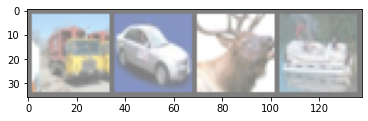

In [27]:
imshow(torchvision.utils.make_grid(images))

# CNN

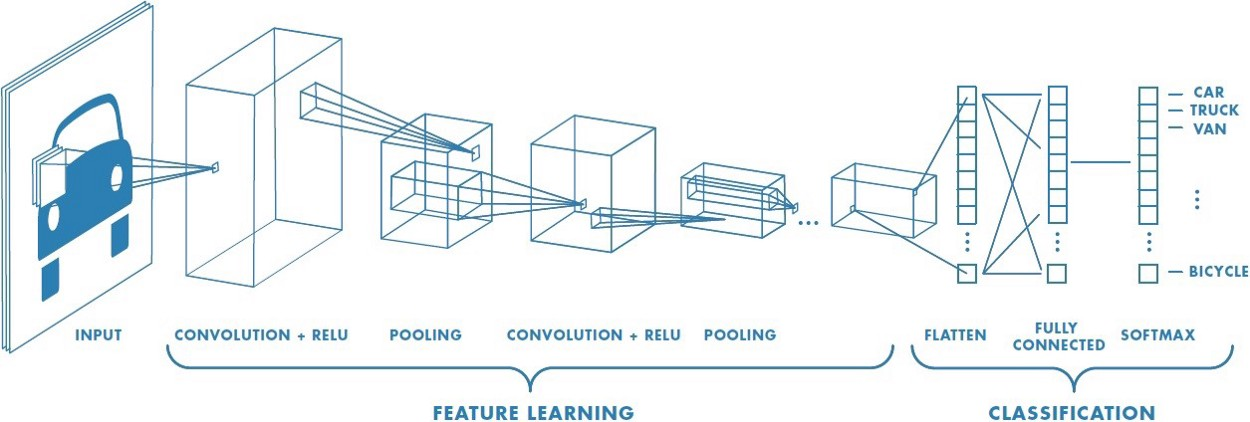

# **Input Image**

*  In the figure, we have an RGB image which has been separated by its three color planes — Red, Green, and Blue. There are a number of such color spaces in which images exist — Grayscale, RGB, HSV, CMYK, etc.





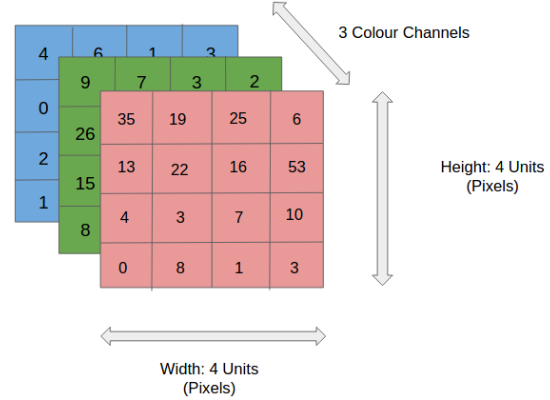

# pooling
*  A pooling layer is a new layer added after the convolutional layer. Specifically, after a nonlinearity (e.g. ReLU) has been applied to the feature maps output by a convolutional layer

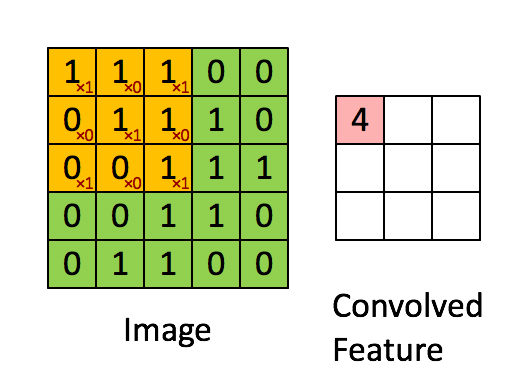

# flatten
* flatten the image (e.g. 3x3 image matrix into a 9x1 vector)
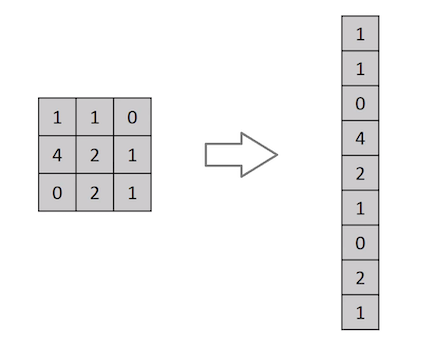

In [28]:
conv1 = nn.Conv2d(3,6,5)
pool = nn.MaxPool2d(2,2)
conv2 = nn.Conv2d(6,16,5)

In [29]:
print(images.shape)

torch.Size([4, 3, 32, 32])


In [30]:
x = conv1(images)
print(x.shape)

torch.Size([4, 6, 28, 28])


In [31]:
x = pool(x)
print(x.shape)

torch.Size([4, 6, 14, 14])


In [32]:
x = conv2(x)
print(x.shape)

torch.Size([4, 16, 10, 10])


In [33]:
x = pool(x)
print(x.shape)

torch.Size([4, 16, 5, 5])


In [34]:
# 16*5*5 ---> 1D

16*5*5

400